In [81]:
from pyspark.sql import SparkSession

In [82]:
input_uri="mongodb://10.75.13.8/fires.fires"
output_uri="mongodb://10.75.13.8/fires.fires"

In [83]:
myspark=SparkSession.builder.appName("wildfire").config("spark.mongodb.input.uri", input_uri).config("spark.mongodb.output.uri", output_uri).config('spark.jars.packages', 'org.mongodb.spark:mongo-spark-connector_2.12:3.0.0').getOrCreate()

df=myspark.read.format('com.mongodb.spark.sql.DefaultSource').load()

print(df.printSchema())

root
 |-- COMPLEX_NAME: string (nullable = true)
 |-- CONT_DATE: timestamp (nullable = true)
 |-- CONT_DOY: double (nullable = true)
 |-- CONT_TIME: string (nullable = true)
 |-- COUNTY: string (nullable = true)
 |-- DISCOVERY_DATE: timestamp (nullable = true)
 |-- DISCOVERY_DOY: integer (nullable = true)
 |-- DISCOVERY_TIME: string (nullable = true)
 |-- FIPS_CODE: string (nullable = true)
 |-- FIPS_NAME: string (nullable = true)
 |-- FIRE_CODE: string (nullable = true)
 |-- FIRE_NAME: string (nullable = true)
 |-- FIRE_SIZE: double (nullable = true)
 |-- FIRE_SIZE_CLASS: string (nullable = true)
 |-- FIRE_YEAR: integer (nullable = true)
 |-- FOD_ID: integer (nullable = true)
 |-- FPA_ID: string (nullable = true)
 |-- ICS_209_INCIDENT_NUMBER: string (nullable = true)
 |-- ICS_209_NAME: string (nullable = true)
 |-- LATITUDE: double (nullable = true)
 |-- LOCAL_FIRE_REPORT_ID: string (nullable = true)
 |-- LOCAL_INCIDENT_ID: string (nullable = true)
 |-- LONGITUDE: double (nullable = t

In [84]:
print(df.show())

+------------+-------------------+--------+---------+------+-------------------+-------------+--------------+---------+---------+---------+----------+---------+---------------+---------+------+----------+-----------------------+------------+-----------+--------------------+-----------------+-------------+--------------+--------------------+---------------------+----------------------+------------------------+--------+----------+--------------------+---------------------+--------------------------+-------------+------------------+-----+---------------+----------------+--------------------+--------------------+-----+
|COMPLEX_NAME|          CONT_DATE|CONT_DOY|CONT_TIME|COUNTY|     DISCOVERY_DATE|DISCOVERY_DOY|DISCOVERY_TIME|FIPS_CODE|FIPS_NAME|FIRE_CODE| FIRE_NAME|FIRE_SIZE|FIRE_SIZE_CLASS|FIRE_YEAR|FOD_ID|    FPA_ID|ICS_209_INCIDENT_NUMBER|ICS_209_NAME|   LATITUDE|LOCAL_FIRE_REPORT_ID|LOCAL_INCIDENT_ID|    LONGITUDE|MTBS_FIRE_NAME|             MTBS_ID|NWCG_REPORTING_AGENCY|NWCG_REPORTIN

In [85]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [86]:
df.createOrReplaceTempView("wildfires")

SQL_QUERY ="SELECT count(_id), FIRE_YEAR from wildfires group by FIRE_YEAR"
year_df=myspark.sql(SQL_QUERY)

In [87]:
print(year_df.show())

+----------+---------+
|count(_id)|FIRE_YEAR|
+----------+---------+
|     68261|     2003|
|     95573|     2007|
|     74491|     2015|
|    114004|     2006|
|     64780|     2013|
|     61450|     1997|
|     75955|     1994|
|     67753|     2014|
|     69279|     2004|
|     75574|     1996|
|     68370|     1998|
|     72769|     2012|
|     78325|     2009|
|     71472|     1995|
|     86587|     2001|
|     67975|     1992|
|     88604|     2005|
|     96416|     2000|
|     79889|     2010|
|     90552|     2011|
+----------+---------+
only showing top 20 rows

None


In [88]:
year_df_pd=year_df.toPandas()

In [89]:
year_df_pd.head(15)

,count(_id),FIRE_YEAR
0,68261,2003
1,95573,2007
2,74491,2015
3,114004,2006
4,64780,2013
5,61450,1997
6,75955,1994
7,67753,2014
8,69279,2004
9,75574,1996


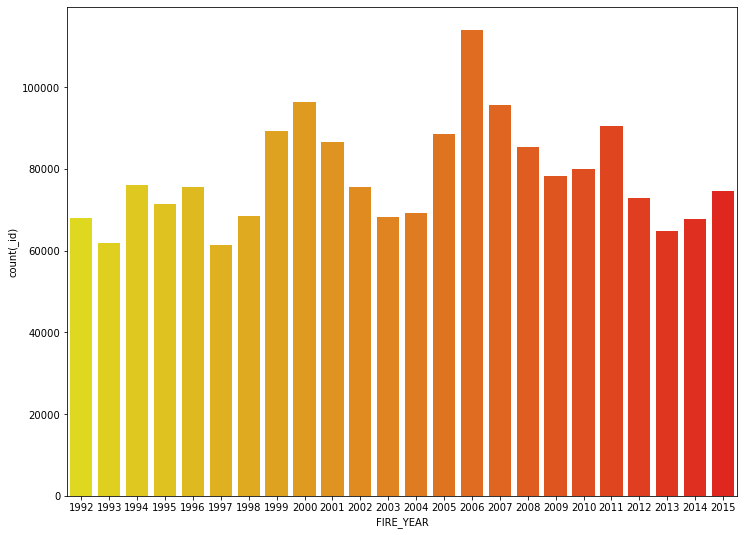

In [90]:
fig, ax = plt.subplots(figsize=(12,9))
ax=sns.barplot(x="FIRE_YEAR", y="count(_id)", data=year_df_pd, palette="autumn_r")

In [91]:
SQL_QUERY="SELECT count(_id), STAT_CAUSE_DESCR from wildfires group by STAT_CAUSE_DESCR order by count(_id) desc"
cause_df=myspark.sql(SQL_QUERY)
cause_df_pd=cause_df.toPandas()
cause_df_pd.head(50)

,count(_id),STAT_CAUSE_DESCR
0,429028,Debris Burning
1,323805,Miscellaneous
2,281455,Arson
3,278468,Lightning
4,166723,Missing/Undefined
5,147612,Equipment Use
6,76139,Campfire
7,61167,Children
8,52869,Smoking
9,33455,Railroad


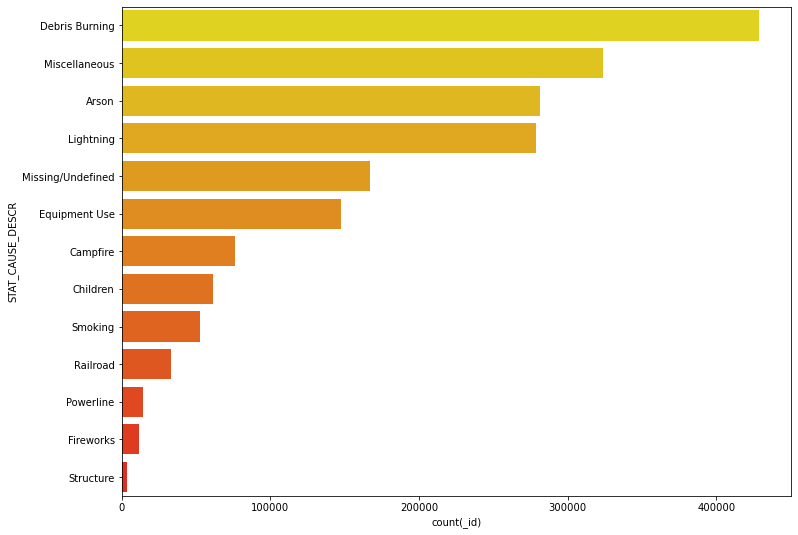

In [92]:
fig, ax = plt.subplots(figsize=(12,9))
ax=sns.barplot(x="count(_id)", y="STAT_CAUSE_DESCR", data=cause_df_pd, palette="autumn_r")

In [93]:
SQL_QUERY="SELECT _id, DISCOVERY_DATE from wildfires"
fire_dates=myspark.sql(SQL_QUERY)
print(fire_dates.show())

+--------------------+-------------------+
|                 _id|     DISCOVERY_DATE|
+--------------------+-------------------+
|[5f9c8d9d17e34d17...|2005-02-02 13:00:00|
|[5f9c8d9d17e34d17...|2004-05-12 08:45:00|
|[5f9c8d9d17e34d17...|2004-05-31 19:21:00|
|[5f9c8d9d17e34d17...|2004-06-28 16:00:00|
|[5f9c8d9d17e34d17...|2004-06-28 16:00:00|
|[5f9c8d9d17e34d17...|2004-06-30 18:00:00|
|[5f9c8d9d17e34d17...|2004-07-01 18:00:00|
|[5f9c8d9d17e34d17...|2005-03-08 13:00:00|
|[5f9c8d9d17e34d17...|2005-03-15 12:00:00|
|[5f9c8d9d17e34d17...|2004-07-01 18:00:00|
|[5f9c8d9d17e34d17...|2004-07-02 18:30:00|
|[5f9c8d9d17e34d17...|2004-07-02 17:30:00|
|[5f9c8d9d17e34d17...|2004-09-03 16:00:00|
|[5f9c8d9d17e34d17...|2004-09-28 12:00:00|
|[5f9c8d9d17e34d17...|2004-10-03 06:30:00|
|[5f9c8d9d17e34d17...|2004-10-03 09:30:00|
|[5f9c8d9d17e34d17...|2004-10-06 14:15:00|
|[5f9c8d9d17e34d17...|2004-10-13 16:18:00|
|[5f9c8d9d17e34d17...|2004-11-20 20:00:00|
|[5f9c8d9d17e34d17...|2004-06-04 10:30:00|
+----------

In [94]:
fire_dates_pd=fire_dates.toPandas()

In [95]:
#lets see if a certain month has more fires
df_month=pd.DataFrame(fire_dates_pd.groupby(fire_dates_pd['DISCOVERY_DATE'].dt.strftime('%B'))['_id'].count().sort_values(ascending=False))

In [96]:
df_month.reset_index(inplace=True)
df_month.rename(columns={"_id":"count", "DISCOVERY_DATE":"month"}, inplace=True)
df_month.head(15)

,month,count
0,July,237234
1,April,236239
2,March,235983
3,August,208578
4,May,163898
5,June,163440
6,February,149142
7,September,132065
8,October,104992
9,January,96438


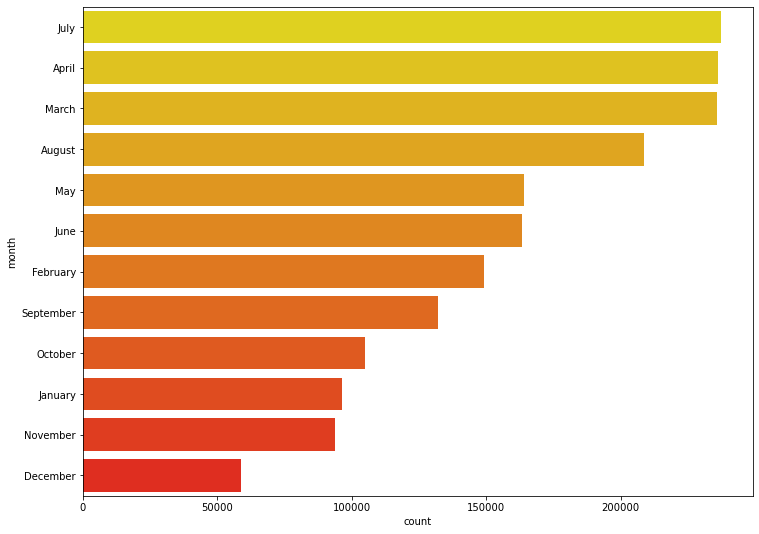

In [97]:
fig, ax = plt.subplots(figsize=(12,9))
ax=sns.barplot(x="count", y="month", data=df_month, palette="autumn_r")

In [98]:
#lets see if a certain day has more fires
df_day=pd.DataFrame(fire_dates_pd.groupby(fire_dates_pd['DISCOVERY_DATE'].dt.strftime('%A'))['_id'].count().sort_values(ascending=False))
df_day.reset_index(inplace=True)
df_day.rename(columns={"_id":"count", "DISCOVERY_DATE":"day"}, inplace=True)
df_day.head(8)

,day,count
0,Saturday,297986
1,Sunday,276779
2,Monday,272441
3,Tuesday,260778
4,Wednesday,258490
5,Friday,258106
6,Thursday,255885


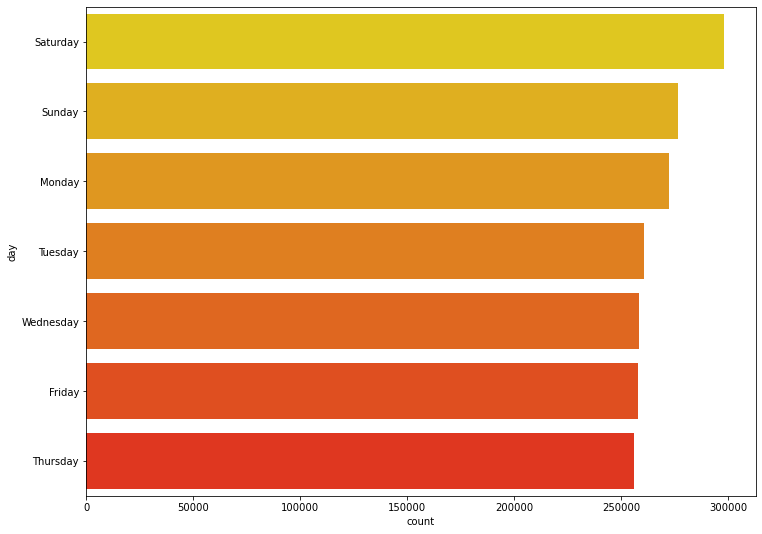

In [99]:
fig, ax = plt.subplots(figsize=(12,9))
ax=sns.barplot(x="count", y="day", data=df_day, palette="autumn_r")

In [124]:
#Let's see if the hour of the day the fire was discovered has any standouts
df_hour=pd.DataFrame(fire_dates_pd.groupby(fire_dates_pd['DISCOVERY_DATE'].dt.strftime('%H'))['_id'].count().sort_values(ascending=False))
df_hour.reset_index(inplace=True)
df_hour.rename(columns={"_id":"count", "DISCOVERY_DATE":"hour"}, inplace=True)
df_hour.head(25)

,hour,count
0,12,961942
1,14,123204
2,15,120480
3,13,106376
4,16,105516
5,17,79164
6,18,59781
7,11,55361
8,19,43482
9,10,39389


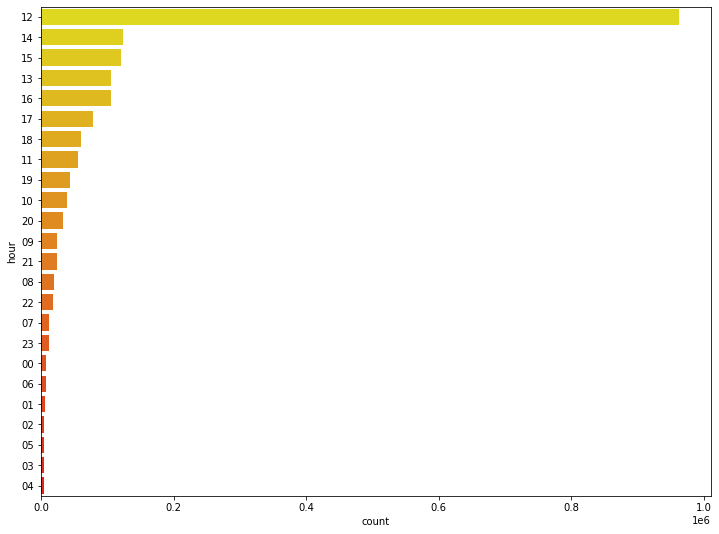

In [125]:
fig, ax = plt.subplots(figsize=(12,9))
ax=sns.barplot(x="count", y="hour", data=df_hour, palette="autumn_r")

In [ ]:
# we see that 12 stands out, but when we loaded the data into mongodb we filled the null values 
# with 12, so hour is probably not useful

In [100]:
#let's look at the size of the fires
SQL_QUERY="SELECT count(_id), FIRE_SIZE_CLASS from wildfires group by FIRE_SIZE_CLASS order by FIRE_SIZE_CLASS asc"
size_class_df=myspark.sql(SQL_QUERY)
print(size_class_df.show())

+----------+---------------+
|count(_id)|FIRE_SIZE_CLASS|
+----------+---------------+
|    666919|              A|
|    939376|              B|
|    220077|              C|
|     28427|              D|
|     14107|              E|
|      7786|              F|
|      3773|              G|
+----------+---------------+

None


In [101]:
#the classes are interesting, but don't tell us what the impact is for each class so let's map the acreage to the classes
class_dict={"A":"0 - .025", "B":"0.26 - 9.9", "C":"10.0 - 99.9", "D":"100 - 299", "E":"300 - 999", "F":"1000 - 4999", "G":"5000+"}
size_class_df_pd=size_class_df.toPandas()
size_class_df_pd.replace({"FIRE_SIZE_CLASS": class_dict}, inplace=True)
size_class_df_pd.head(10)

,count(_id),FIRE_SIZE_CLASS
0,666919,0 - .025
1,939376,0.26 - 9.9
2,220077,10.0 - 99.9
3,28427,100 - 299
4,14107,300 - 999
5,7786,1000 - 4999
6,3773,5000+


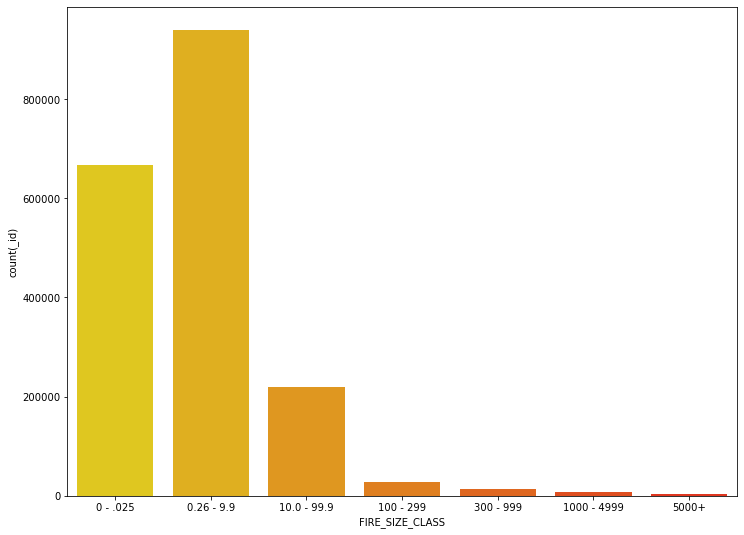

In [102]:
fig, ax = plt.subplots(figsize=(12,9))
ax=sns.barplot(x="FIRE_SIZE_CLASS", y="count(_id)", data=size_class_df_pd, palette="autumn_r")

In [103]:
#let's combine some attributes to see if there are any interesting combinations
#combine average fire size and cause
SQL_QUERY="SELECT AVG(FIRE_SIZE) as avg_size, STAT_CAUSE_DESCR from wildfires group by STAT_CAUSE_DESCR order by avg_size desc"
avg_size_cause_df=myspark.sql(SQL_QUERY)
print(avg_size_cause_df.show())

+------------------+-----------------+
|          avg_size| STAT_CAUSE_DESCR|
+------------------+-----------------+
| 312.5439943429326|        Lightning|
| 111.3955467192667|        Powerline|
|52.492610446896634|Missing/Undefined|
|46.060255036654944|    Equipment Use|
|45.360745785036634|        Structure|
|45.036859703968545|         Campfire|
| 44.45331048618967|    Miscellaneous|
| 33.70796098833319|            Arson|
| 27.67020113043689|        Fireworks|
|25.395718732028005|         Railroad|
|15.938650668633812|          Smoking|
| 13.92867764249422|   Debris Burning|
|7.6811072648655045|         Children|
+------------------+-----------------+

None


In [104]:
avg_size_cause_df_pd=avg_size_cause_df.toPandas()

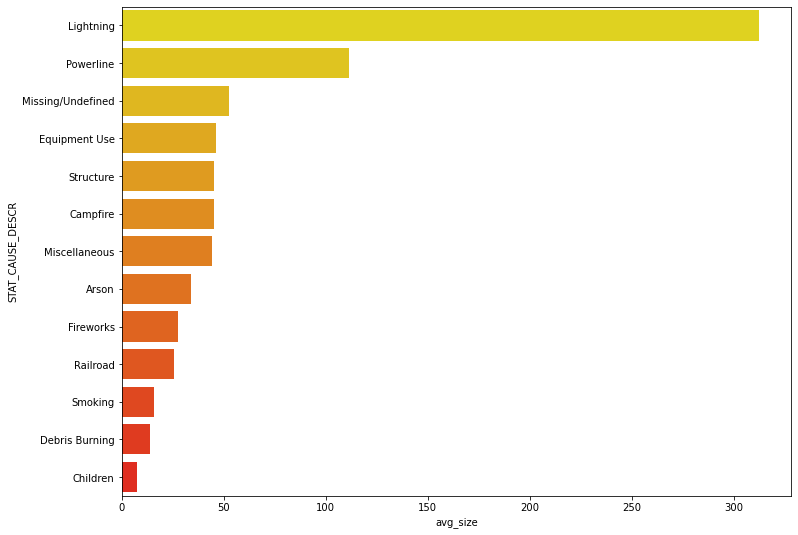

In [105]:
fig, ax = plt.subplots(figsize=(12,9))
ax=sns.barplot(x="avg_size", y="STAT_CAUSE_DESCR", data=avg_size_cause_df_pd, palette="autumn_r")

In [106]:
#how about the length of time the fire burns from discovery to containment associated with cause
SQL_QUERY="SELECT AVG(ABS(datediff(CONT_DATE,DISCOVERY_DATE))) as avg_burn_dur, STAT_CAUSE_DESCR from wildfires group by STAT_CAUSE_DESCR order by avg_burn_dur desc"
avg_burn_dur_cause_df=myspark.sql(SQL_QUERY)
print(avg_burn_dur_cause_df.show())

+-------------------+-----------------+
|       avg_burn_dur| STAT_CAUSE_DESCR|
+-------------------+-----------------+
|  3.005524934613562|        Lightning|
| 1.3639366768201124|    Miscellaneous|
|  1.038885990609575|          Smoking|
| 0.9933546932478937|        Powerline|
| 0.7838497720010054|         Campfire|
| 0.7026938239159002|        Structure|
| 0.5486215573120368|            Arson|
| 0.5103488520524463|    Equipment Use|
| 0.4982599823901832|Missing/Undefined|
| 0.4971550497866287|         Railroad|
|0.48339797559360514|        Fireworks|
| 0.3777668470241023|   Debris Burning|
|  0.326312900902137|         Children|
+-------------------+-----------------+

None


In [107]:
avg_burn_dur_cause_df_pd=avg_burn_dur_cause_df.toPandas()

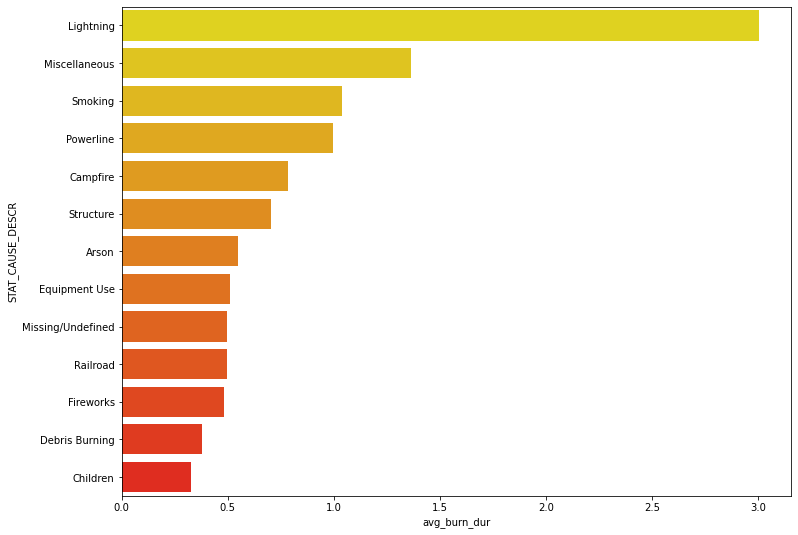

In [108]:
fig, ax = plt.subplots(figsize=(12,9))
ax=sns.barplot(x="avg_burn_dur", y="STAT_CAUSE_DESCR", data=avg_burn_dur_cause_df_pd, palette="autumn_r")

In [109]:
#lets take a look at some maps of fires to see if there are geographical items of interest
import plotly.graph_objects as go

In [110]:
#number of fires by state
SQL_QUERY="SELECT count(_id), STATE from wildfires group by STATE"
state_count_df=myspark.sql(SQL_QUERY)
print(state_count_df.show())

+----------+-----+
|count(_id)|STATE|
+----------+-----+
|     71586|   AZ|
|     81315|   SC|
|     30013|   LA|
|     44769|   MN|
|     25949|   NJ|
|        66|   DC|
|     61088|   OR|
|     21833|   VA|
|       480|   RI|
|     14166|   WY|
|     27089|   KY|
|      2452|   NH|
|     10502|   MI|
|     16956|   NV|
|     31861|   WI|
|     36698|   ID|
|    189550|   CA|
|      7973|   NE|
|      4976|   CT|
|     40767|   MT|
+----------+-----+
only showing top 20 rows

None


In [111]:
state_count_df_pd=state_count_df.toPandas()

In [112]:
fig = go.Figure(data=go.Choropleth(locations=state_count_df_pd['STATE'], z=state_count_df_pd['count(_id)'], locationmode='USA-states', colorscale='oranges', colorbar_title="Number of Fires", text=state_count_df_pd['STATE']))
fig.update_layout(title_text='Number of Wildfires by State 1992-2015', geo_scope='usa')
fig.show()

In [113]:
#If we want to classify the cause of the fire, perhaps there is a relation to cause by state

#build a query statement from the causes that we already pulled
SQL_QUERY="SELECT STATE,"

for index in avg_size_cause_df_pd.index:
    #need to remove spaces and special characters in a couple of the causes
    SQL_QUERY=SQL_QUERY + f" count(case when STAT_CAUSE_DESCR='{avg_size_cause_df_pd['STAT_CAUSE_DESCR'][index]}' then 1 end) as {avg_size_cause_df_pd['STAT_CAUSE_DESCR'][index].replace(' ','_').replace('/','_')},"

#remove the last comma    
SQL_QUERY=SQL_QUERY[:-1]
SQL_QUERY=SQL_QUERY + " from wildfires group by STATE"

print(SQL_QUERY)
state_causes_counts_df=myspark.sql(SQL_QUERY)
print(state_causes_counts_df.show())

SELECT STATE, count(case when STAT_CAUSE_DESCR='Lightning' then 1 end) as Lightning, count(case when STAT_CAUSE_DESCR='Powerline' then 1 end) as Powerline, count(case when STAT_CAUSE_DESCR='Missing/Undefined' then 1 end) as Missing_Undefined, count(case when STAT_CAUSE_DESCR='Equipment Use' then 1 end) as Equipment_Use, count(case when STAT_CAUSE_DESCR='Structure' then 1 end) as Structure, count(case when STAT_CAUSE_DESCR='Campfire' then 1 end) as Campfire, count(case when STAT_CAUSE_DESCR='Miscellaneous' then 1 end) as Miscellaneous, count(case when STAT_CAUSE_DESCR='Arson' then 1 end) as Arson, count(case when STAT_CAUSE_DESCR='Fireworks' then 1 end) as Fireworks, count(case when STAT_CAUSE_DESCR='Railroad' then 1 end) as Railroad, count(case when STAT_CAUSE_DESCR='Smoking' then 1 end) as Smoking, count(case when STAT_CAUSE_DESCR='Debris Burning' then 1 end) as Debris_Burning, count(case when STAT_CAUSE_DESCR='Children' then 1 end) as Children from wildfires group by STATE
+-----+---

In [114]:
state_causes_counts_df_pd=state_causes_counts_df.toPandas()

In [115]:
#iterate through the columns to make the individual map plots
for (columnName, columnValues) in state_causes_counts_df_pd.iteritems():
    #don't want the STATE column
    if columnName!="STATE":
        fig = go.Figure(data=go.Choropleth(locations=state_causes_counts_df_pd['STATE'], z=columnValues.values, locationmode='USA-states', colorscale='oranges', colorbar_title="Number of Fires", text=state_count_df_pd['STATE']))
        fig.update_layout(title_text=f'Number of Wildfires Caused by {columnName} by State 1992-2015', geo_scope='usa')
        fig.show()

In [116]:
#let's use the latitude and longitude date to make an interesting visual of the data
SQL_QUERY="SELECT _id, latitude, longitude from wildfires"
lat_long_df=myspark.sql(SQL_QUERY)
lat_long_df_pd=lat_long_df.toPandas()

In [117]:
lat_long_df_pd.head()

,_id,latitude,longitude
0,"(5f9c8d9d17e34d17360eeb77,)",40.036944,-121.005833
1,"(5f9c8d9d17e34d17360eeb78,)",38.933056,-120.404444
2,"(5f9c8d9d17e34d17360eeb79,)",38.984167,-120.735556
3,"(5f9c8d9d17e34d17360eeb7a,)",38.559167,-119.913333
4,"(5f9c8d9d17e34d17360eeb7b,)",38.559167,-119.933056


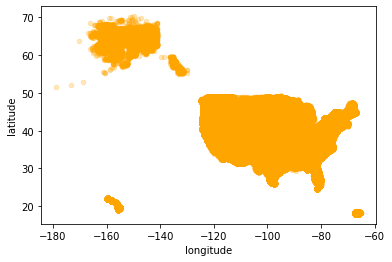

In [118]:
lat_long_df_pd.plot(kind='scatter', x='longitude', y='latitude', color='orange', alpha=0.25)
plt.show()

In [122]:
myspark

In [ ]:
#We have seen some interesting visualizations and have decided on the features to use. We will do this in another notebook.